In [3]:
import os
# if using Apple MPS, fall back to CPU for unsupported ops
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

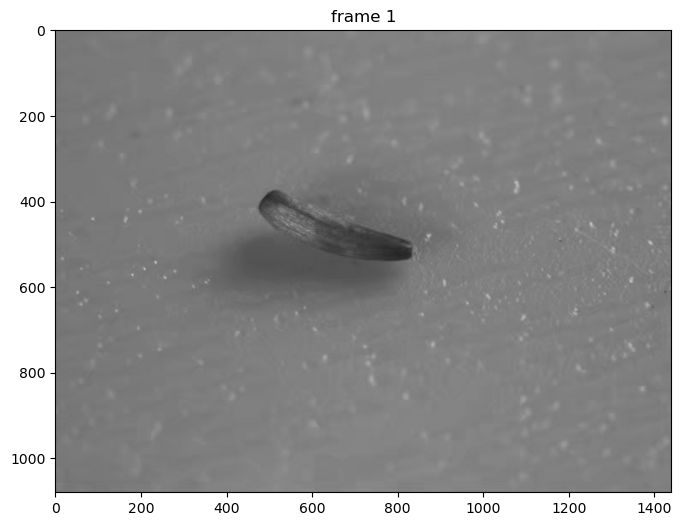

In [4]:
# `video_dir` a directory of JPEG frames with filenames like `<frame_index>.jpg`
video_dir = "/Users/persie/Movies/Mokap_Video/mokap/240905-1616/240905-1616_cam0_avocado_session19"
video_name = "240905-1616_cam0_avocado_session19"

# scan all the JPEG frame names in this directory
frame_names = [
    p for p in os.listdir(video_dir)
    if os.path.splitext(p)[-1] in [".jpg", ".jpeg", ".JPG", ".JPEG"]
]
frame_names.sort(key=lambda p: int(os.path.splitext(p)[0]))

# take a look the first video frame
frame_idx = 1
plt.figure(figsize=(9, 6))
plt.title(f"frame {frame_idx}")
plt.imshow(Image.open(os.path.join(video_dir, frame_names[frame_idx])))

The task here is to get from the file folder full of JPG files, and create a numpy container that is filled by the human annotator

First: Be able to scroll through the frames

In [7]:
frame_slider_max = len(frame_names)

def getFrame(frame_nr):
    global frame_idx
    frame_idx = frame_nr

cv2.namedWindow(f"User Input: {video_name}", cv2.WINDOW_AUTOSIZE)
cv2.createTrackbar("Frame", f"User Input: {video_name}", 0, frame_slider_max, getFrame)

# main loop
while 1:
    # Get the next videoframe
    frame = cv2.imread(os.path.join(video_dir, frame_names[frame_idx]))

    # show frame, break the loop if no frame is found
 
    cv2.imshow("Video", frame)

        
    # stop playback when q is pressed
    k = cv2.waitKey(20) & 0xFF
    if k == ord('q'):
        break

# release resources
cv2.destroyAllWindows()
cv2.waitKey(1)


2024-10-28 17:42:05.683 python[17493:2766766] +[IMKClient subclass]: chose IMKClient_Legacy
2024-10-28 17:42:05.683 python[17493:2766766] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


-1